<a href="https://colab.research.google.com/github/wuchenyu38/18ma573chenyuwu/blob/master/Correlation_aac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/wuchenyu38/18ma573chenyuwu.git

Cloning into '18ma573chenyuwu'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 321 (delta 39), reused 0 (delta 0), pack-reused 203
Receiving objects: 100% (321/321), 424.11 KiB | 1.81 MiB/s, done.
Resolving deltas: 100% (104/104), done.


In [0]:
cd 18ma573chenyuwu/src

/content/18ma573chenyuwu/src


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import BSM as bs

In [0]:
S0= 100; K=110; r=.0475; sigma =.2; T=1; num_step = 4; num_path=100; otype =1;

In [0]:
def bsm_option_payoff_generator(sigma,S0,r,otype,K, T,num_step,num_path):
  m = num_step;
  n = num_path;
  
  #create array to store payoff and call prices;
  stock= np.zeros((n,m+1))
  stock[:,0] = S0;
  a = np.zeros(n) #arithematic call
  ap = np.zeros(n) #arithematic payoff
  ep = np.zeros(n) #european payoff
  g = np.zeros(n) #geometric call
  gp = np.zeros(n) #geometric payoff
  sp = np.zeros(n) #stock payoff
  
  for i in range(n):
    [t,W] = bs.BM_gen(0,T,m)
    for j in range(m):
      stock[i,j+1] = S0 * np.exp((r-(0.5*(sigma**2)))*t[j+1] + sigma*W[j+1])
    
    #Arithematic asian call payoff
    a[i] = np.mean(stock[i,:])
    if a[i]>K:
      ap[i] = (a[i]-K)
    else:
      ap[i] = 0

    #European call payoff
    if stock[i, m-1]>K:
      ep[i] = (stock[i, m-1]-K)
    else:
      ep[i] = 0

    
    #Geometric Asian call payoff
    g[i] = (stock[i,:].prod())**(1.0/len(stock[i,:])) #calculate geometric aisan call
    if g[i]>K:
      gp[i] = (g[i] - K)
    else:
      gp[i] = 0

    sp[i] = stock[i,m-1] - S0

  plt.figure()
  plt.plot(ap,sp,'ro', color = 'r')
  plt.xlabel("Arithematic Payoff")
  plt.ylabel("Stock Payoff")
  plt.title("Ari vs. Stock")

  plt.figure()
  plt.plot(ap,ep,'ro', color='b')
  plt.xlabel("Arithematic Payoff")
  plt.ylabel("European Payoff")
  plt.title("Ari vs. Euro")
  
  plt.figure()
  plt.plot(ap,gp,'ro',color='g')
  plt.xlabel("Arithematic Payoff")
  plt.ylabel("Geometric Payoff")
  plt.title("Ari vs. Geo")

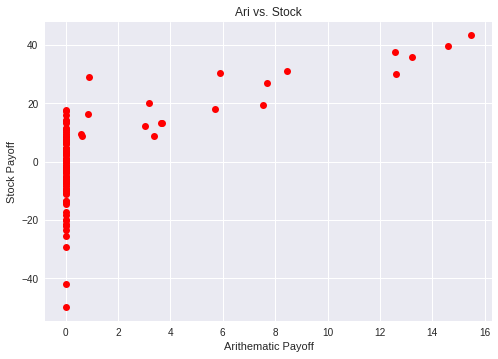

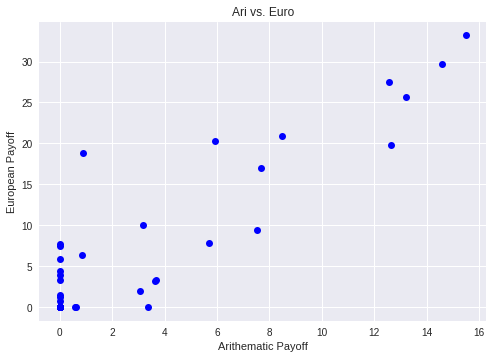

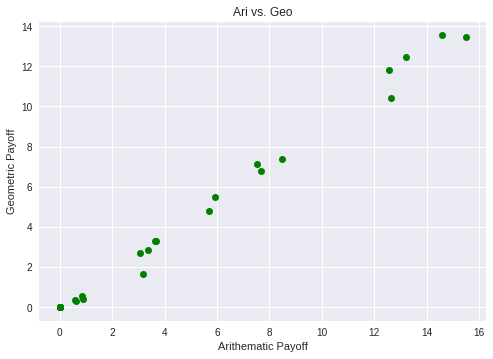

In [0]:
bsm_option_payoff_generator(sigma,S0,r,otype,K,T,num_step,num_path)

Based on graph above, we can find arithematic asian payoff has strong correlation with geometric asian payoff.